In [23]:
using PyPlot

In [38]:
#Our original function which we will shift and scale
function ϕ(x::Real)
    b=abs(x)
    if b>1
        return zero(x)
    end
    return 1-b
end

function ψ(l::Int,i::Int,x::Float64)
    return ϕ((1<<l) * x - i)
end

# ψ{D}(ls::NTuple{D,Int}, is::NTuple{D,Int}, ....)
function ψ{D,T<:Real}(ls::NTuple{D,Int}, is::NTuple{D,Int}, xs::NTuple{D,T})
    ans=1
    for k = 1:length(ls)
        ans *= ψ(ls[k],is[k],xs[k])
    end
    return ans
end


function plotfunc1D(f::Function)
    xs=linspace(0,1,300)
    # y = [f((x,)) for x in xs]
    ys=[f(x,) for x in xs]
    surf=plot(xs,ys)
end

function plotfunc2D(f::Function)
    xs=linspace(0,1,250)'
    ys=linspace(0,1,250)
    zs=[f((x,y)) for x in xs, y in ys]
    surf=plot_surface(xs,ys,zs)
end

plotfunc2D (generic function with 1 method)

In [54]:
function standardCoefficients{D}(f::Function, ls::NTuple{D,Int})
    positions = ntuple(i -> (1<<ls[i])+1,D)
    coeffs = zeros(Float64, positions)
    for place in CartesianRange(positions)
        x = ntuple(i-> (2.0^-ls[i])*(place[i]-1),D)
        coeffs[place] = f(x) 
    end
    return coeffs
end

function standardReconstruct{D,T<:Real}(coefficients::AbstractArray, ls::NTuple{D,Int}, xs::NTuple{D,T})
    positions = ntuple(i -> (1<<ls[i])+1,D)
    value=0
    for place in CartesianRange(positions)
        is = ntuple(i->place[i]-1,D)
        value += coefficients[place]*ψ(ls, is, xs)
    end
    return value
end

#could be more efficient, but let's move on to hierarchical


# function standardCoefficients{D}(f::Function, l::NTuple{D,Int})
#     if length(l)==1
#         return cat(1,[f([j]) for j in 0:Float32(2)^-l[1]:1])
#     end
#     return cat(length(l),[standardCoefficients(proj2(f,j),l[2:end]) for j in 0:Float32(2)^-l[1]:1]...)
# end

# function proj2(f,j)
#     return (x-> f(unshift!(x,j)))
# end

standardReconstruct (generic function with 1 method)

In [58]:
coeffs=standardCoefficients(x->sin(pi*x[1]+x[2]),(3,3))
tic()
standardReconstruct(coeffs, (3,3), (.2,.5))
toq()

0.016724898

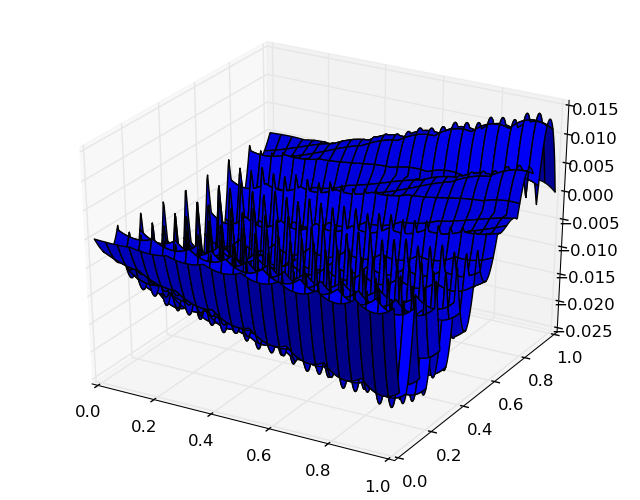

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7fd258b60f10>

In [57]:
plotfunc2D(x-> standardReconstruct(coeffs,(3,3),(x[1],x[2]))-sin(pi*x[1]+x[2]))

In [123]:
zeros(Float64,(9,9))

9x9 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0